#  ---------- Bike Sharing System 2011 ----------


<img src='./img/descarga.png' width='800px' height='100px'>

*****


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Librerías

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Carga de Datos

In [63]:
df = pd.read_csv('./data/bike+sharing+dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
df.shape

(17379, 17)

Como solo voy a trabajar con un año para mi hipótesis. Elegí el 2011.

In [65]:
df2011= df.query('yr == 0')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
df2011.shape

(8645, 17)

In [67]:
df2011.to_csv('./data/Dataset_2011.csv', index=False) 

In [68]:
df2012 = df.query('yr == 1')
df2012.to_csv('./data/Dataset_2012.csv', index=False)

## Primera exploración

In [69]:
#Vista de primeros datos
df2011 = pd.read_csv('./data/Dataset_2011.csv',sep=',')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
# ¿Qué tipos de datos conforman nuestro DataFrame?
df2011.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [71]:
# ¿Cuántas filas y columnas tenemos?
df2011.shape

(8645, 17)

In [72]:
# ¿Los nombres d enuestras columnas poseen un estándar de escritura?
df2011.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [73]:
#Obtenemos información general del dataframe a tráves de los métodos info() y describe() -> solo númericas
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  casual      8645 non-null   int64  
 15  registered  8645 non-null   int64  
 16  cnt         8645 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.1+ MB


In [74]:
df2011.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8645.000000,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,2495.740872,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,4323.000000,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,6484.000000,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,8645.000000,4.000000,0.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


De las 17 columnas, 12 de ellas son númericas, 4 de tipo cuantitativo continuo y un object que debemos de convertir a el tipo correcto de dato: datetime

## Limpieza

In [75]:
df2011.set_index('instant',inplace=True)
df2011.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [76]:
df2011['dteday'] = pd.to_datetime(df2011['dteday'])
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      8645 non-null   datetime64[ns]
 1   season      8645 non-null   int64         
 2   yr          8645 non-null   int64         
 3   mnth        8645 non-null   int64         
 4   hr          8645 non-null   int64         
 5   holiday     8645 non-null   int64         
 6   weekday     8645 non-null   int64         
 7   workingday  8645 non-null   int64         
 8   weathersit  8645 non-null   int64         
 9   temp        8645 non-null   float64       
 10  atemp       8645 non-null   float64       
 11  hum         8645 non-null   float64       
 12  windspeed   8645 non-null   float64       
 13  casual      8645 non-null   int64         
 14  registered  8645 non-null   int64         
 15  cnt         8645 non-null   int64         
dtypes: datetime64[ns](1), float64

In [77]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])['cnt'].sum() #Faltan días festivos, 1 de Enero, 25 de Diciembre

dteday      holiday  weekday
2011-01-17  1        1          1000
2011-02-21  1        1          1107
2011-04-15  1        5          3126
2011-05-30  1        1          4098
2011-07-04  1        1          6043
2011-09-05  1        1          3351
2011-10-10  1        1          5117
2011-11-11  1        5          3368
2011-11-24  1        4          1495
2011-12-26  1        1          1317
Name: cnt, dtype: int64

In [78]:
import holidays
from datetime import date

us_holidays = holidays.UnitedStates(state='DC')
df['holiday'] = df['dteday'].apply(lambda x: 1 if x in us_holidays else 0)

df2011['day'] = df2011['dteday'].dt.day

df2011['weekday'] = df2011['dteday'].dt.day_of_week


In [79]:
# Función para actualizar la columna 'workingday'.
def actualizar_workingday(row):
    if row['weekday'] in [5, 6] or row['holiday'] == 1:
        return 0
    else:
        return 1

# Aplicar la función a cada fila del DataFrame
df2011['workingday'] = df2011.apply(actualizar_workingday, axis=1)

In [80]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])['cnt'].sum() 

dteday      holiday  weekday
2011-01-17  1        0          1000
2011-02-21  1        0          1107
2011-04-15  1        4          3126
2011-05-30  1        0          4098
2011-07-04  1        0          6043
2011-09-05  1        0          3351
2011-10-10  1        0          5117
2011-11-11  1        4          3368
2011-11-24  1        3          1495
2011-12-26  1        0          1317
Name: cnt, dtype: int64

In [81]:
df2011.drop(columns=['yr'],inplace=True) 
df2011.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,2011-01-01,1,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01,1,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,2011-01-01,1,1,3,0,5,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,2011-01-01,1,1,4,0,5,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


- La instancia la tomaré como índice.
- Los días festivos ('holiday'), los días de la semana ('weekday') no eran correctos, así que tuvimos que arreglarlos reescribiendo los mismos.
- los 'Workingday' se basan en 'holiday' y  weekday' por ende, también me propuse a reescribirlo en base a aquellas variables para evitar futuros errores
.

Fuente : ['calendario_2011-USA'](https://www.cuandoenelmundo.com/calendario/estados-unidos/2011) and **Librería holidays**
- Eliminamos la variable **'yr'** ya que representaba el 2011 en valores = 0.

****

In [82]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.027646,3.009485,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448,15.665240
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000,8.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000,16.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000,23.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000,31.000000
std,NaN,1.105477,3.428147,6.907822,0.163966,2.000845,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854,8.793108


- Season: Podemos ver que la temporada de verano abarca la media y el 75%.
- temp, atemp, hum: Los valores normalizados no son tan visibles al momento de gráficar aquellos datos.
- casual, registered, cnt : Los valores máximos se encuentran bastante alejados.


*****

- **temp**: Temperatura normalizada en Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

- **atemp**: Sensación térmica normalizada en Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

- **hum**: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

- **windspeed**: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

*Aplicamos la fórmula ajustada:*

Temperatura Discreta = valor_ajustado_temp = **0.24** **×** multiplicamos por su ajuste = **41**

*Calculamos el resultado:*

Temperatura Discreta = round(9.84)

Temperatura Discreta =10

In [83]:
df2011 = df2011.assign(
    temperature = (lambda x : round(x.temp * 41)),
    thermal_sensation = (lambda x : round(x.atemp * 50)),
    humidity = (lambda x : round(x.hum * 100)),
    wind_speed = (lambda x: round(x.windspeed * 67))
)

In [84]:
df2011.drop(columns= ['temp','atemp','hum', 'windspeed'], inplace=True)

In [85]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.027646,3.009485,0.683748,1.437594,28.600578,115.193869,143.794448,15.665240,20.035049,23.453788,64.342973,12.808213
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,26.000000,31.000000,8.000000,13.000000,16.000000,49.000000,7.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,14.000000,90.000000,109.000000,16.000000,20.000000,24.000000,65.000000,13.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,38.000000,168.000000,211.000000,23.000000,27.000000,31.000000,81.000000,19.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,272.000000,567.000000,651.000000,31.000000,39.000000,50.000000,100.000000,57.000000
std,NaN,1.105477,3.428147,6.907822,0.163966,2.000845,0.465040,0.653859,38.840789,109.461014,133.797854,8.793108,8.126433,8.851484,19.629328,8.253896


*****

- Ahora analizaremos si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipótesis.

El dataframe se encuentra armado en base a horas, es decir, por día tendremos 24 registros.

- *Nos damos cuenta que faltan datos: **365 * 24 = 8760***

In [86]:
df2011.shape

(8645, 16)

In [87]:
df2011['dteday'].nunique()

365

In [88]:
df_hour = df2011.groupby(['dteday','mnth'])[['hr']].count()
df_hour

,,hr
dteday,mnth,
2011-01-01,1,24
2011-01-02,1,23
2011-01-03,1,22
2011-01-04,1,23
2011-01-05,1,23
...,...,...
2011-12-27,12,24
2011-12-28,12,23
2011-12-29,12,24


In [89]:
horas_faltantes = df_hour.query('hr <= 23').sort_values(by='mnth') 
horas_faltantes.reset_index()

,dteday,mnth,hr
0,2011-01-02,1,23
1,2011-01-30,1,23
2,2011-01-29,1,23
3,2011-01-28,1,23
4,2011-01-27,1,8
5,2011-01-26,1,16
6,2011-01-25,1,23
7,2011-01-23,1,23
8,2011-01-22,1,23
9,2011-01-19,1,23


- Como no hubo utilidad de las bicicletas durante dichas horas, no figura en la Base de Datos. Ahora la pregunta es, vale rellenar con valores aquellas filas restantes que equivalen al 1,43% del total.

La respuesta es:  Depende de lo que queramos resolver.
EXPLICAR EL PORQUE DE NUESTRA DECISIÓN Y SI LO HARÍAMOS COMO?

In [90]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
hr                   0
holiday              0
weekday              0
workingday           0
weathersit           0
casual               0
registered           0
cnt                  0
day                  0
temperature          0
thermal_sensation    0
humidity             0
wind_speed           0
dtype: int64

In [91]:
df2011[(df2011['dteday'].isna()) | (df2011['season'].isna()) | (df2011['mnth'].isna()) | (df2011['hr'].isna()) | (df2011['holiday'].isna()) |
       (df2011['weekday'].isna()) | (df2011['workingday'].isna()) | (df2011['weathersit'].isna()) | (df2011['casual'].isna()) |
       (df2011['registered'].isna()) | (df2011['cnt'].isna()) | (df2011['day'].isna()) | (df2011['temperature'].isna()) |
       (df2011['thermal_sensation'].isna()) | (df2011['humidity'].isna()) | (df2011['wind_speed'].isna())]

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
instant,,,,,,,,,,,,,,,,


In [92]:
df2011.duplicated(keep=False).sum()

0

In [93]:
column_order = ['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday', 'workingday', 'temperature', 'thermal_sensation', 'humidity',
                'weathersit',  'wind_speed', 'casual', 'registered', 'cnt']

# Reordenar las columnas
df2011 = df2011[column_order]

In [94]:
df2011.columns

Index(['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday',
       'workingday', 'temperature', 'thermal_sensation', 'humidity',
       'weathersit', 'wind_speed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [95]:
df2011.to_csv('./data/Dataset_clear_2011.csv')

In [96]:
# sns.pairplot(df2011)


<img src='./img/pairplot.png' width='1000px' height='1000px'>

## Análisis 

### Análisis Univariante

In [97]:
df2011 = pd.read_csv('./data/Dataset_clear_2011.csv',index_col='instant',parse_dates=['dteday'])
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


In [98]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             8645 non-null   datetime64[ns]
 1   season             8645 non-null   int64         
 2   mnth               8645 non-null   int64         
 3   day                8645 non-null   int64         
 4   hr                 8645 non-null   int64         
 5   weekday            8645 non-null   int64         
 6   holiday            8645 non-null   int64         
 7   workingday         8645 non-null   int64         
 8   temperature        8645 non-null   float64       
 9   thermal_sensation  8645 non-null   float64       
 10  humidity           8645 non-null   float64       
 11  weathersit         8645 non-null   int64         
 12  wind_speed         8645 non-null   float64       
 13  casual             8645 non-null   int64         
 14  registered   

 ¿Es dispersa? ¿Tiene asimetría? ¿En qué sentido? ¿Por qué? ¿Hay outliers?

In [99]:
def grafico_univariante(df : pd.DataFrame, columna):
    """ Psamos un Dataframe con su columna, para que nos retorne dos gráficos.
    - El primero será de tipo boxplot con medidas estadísticas : mediana - std.
    - El segundo será un histograma para ver como es la distribución de los datos.
    
    Args:
        df (DataFrame): typo dataframe
        columna (_type_): 
        
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    # Agregar el gráfico de caja (boxplot) arriba
    sns.boxplot(df[columna], ax=ax, showfliers=False, vert=False)

    media = np.mean(df[columna])
    median_val = np.median(df[columna])
    std_val = np.std(df[columna])

    ax.axvline(median_val, color='red', linestyle='dashdot', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(media + std_val, color='black', linestyle='dashdot', linewidth=2, label=f'std: {std_val:.2f}')
    ax.axvline(media - std_val, color='black', linestyle='dashdot', linewidth=2, label=f'std: {std_val:.2f}')

    leg = ax.legend()
    leg.set_bbox_to_anchor((1, 0.05)) 

    # Eliminar los ticks del eje y del gráfico de caja
    ax.set_yticklabels([])
    ax.set_yticks([])

    # Agregar el gráfico de histograma en el centro
    ax_hist = fig.add_axes([0.1, 0.45, 0.8, 0.4], sharex=ax)
    sns.histplot(df[columna], kde=False, ax=ax_hist)

    # Eliminar los ticks del eje x del gráfico de histograma
    ax_hist.set_xticks([])
    ax_hist.set_xticklabels([])

    # Ajustar la posición del gráfico de caja
    pos = ax.get_position()
    pos.y0 = 1.02
    ax.set_position(pos)

    ax_hist.set_ylabel('Frequency');

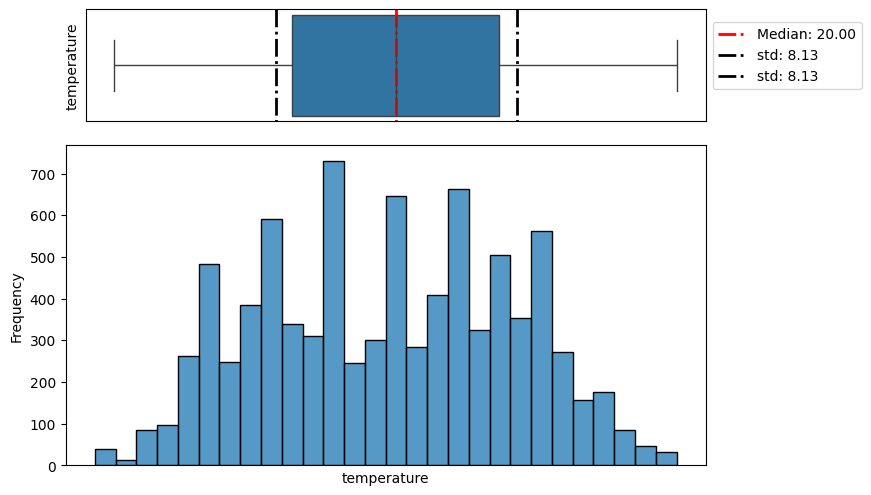

In [100]:
grafico_univariante(df2011,'temperature')

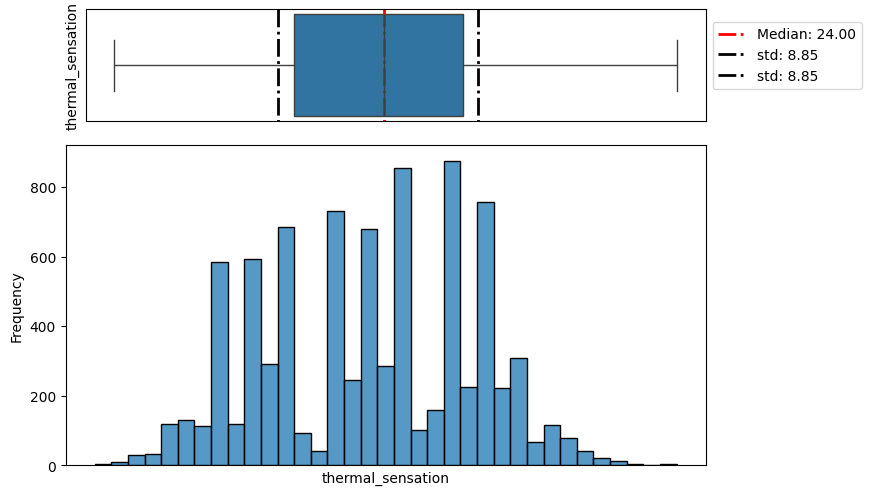

In [101]:
grafico_univariante(df2011,'thermal_sensation')

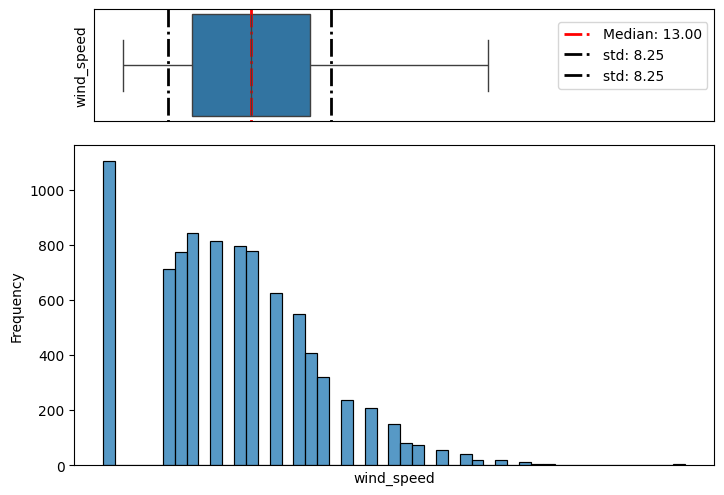

In [102]:
grafico_univariante(df2011,'wind_speed')

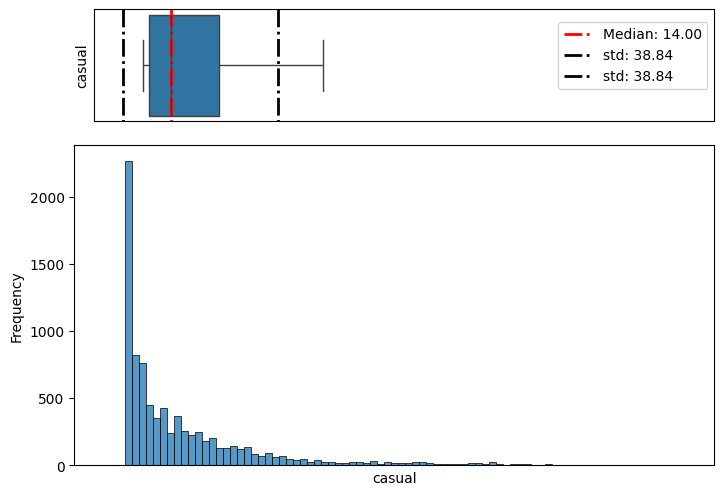

In [103]:
grafico_univariante(df2011,'casual')

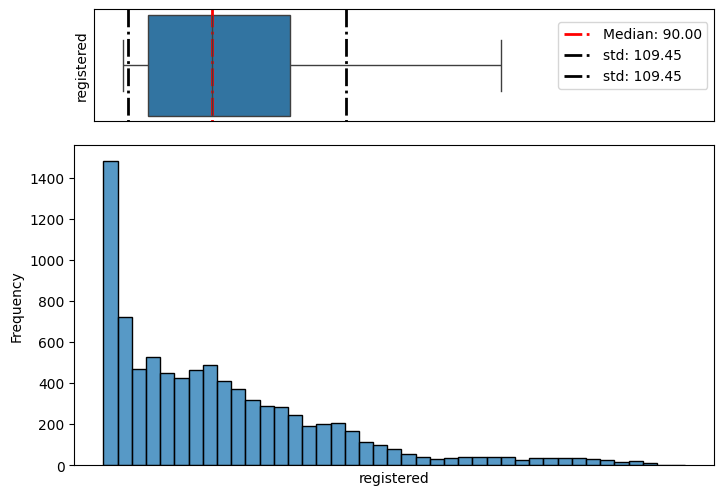

In [104]:
grafico_univariante(df2011,'registered')

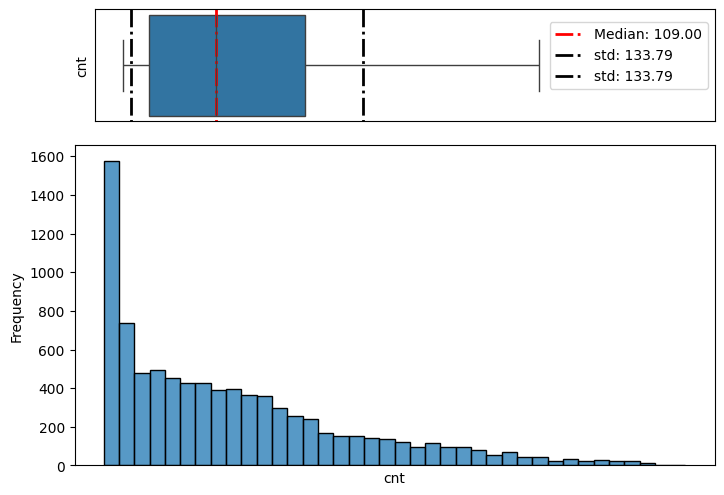

In [105]:
grafico_univariante(df2011,'cnt')

In [106]:
# rojo = "#FF0033"
# df2011.hist(figsize=(20,15),grid=False,color=rojo);

### Análisis Bivariante

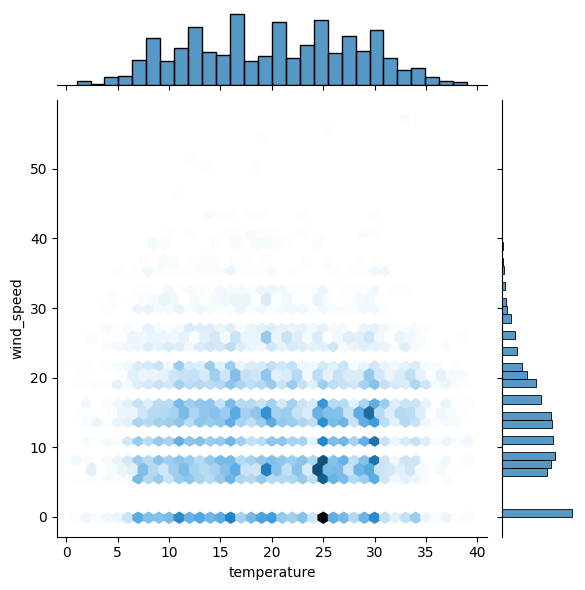

In [107]:
sns.jointplot(data=df2011,x='temperature',y='wind_speed',kind='hex');

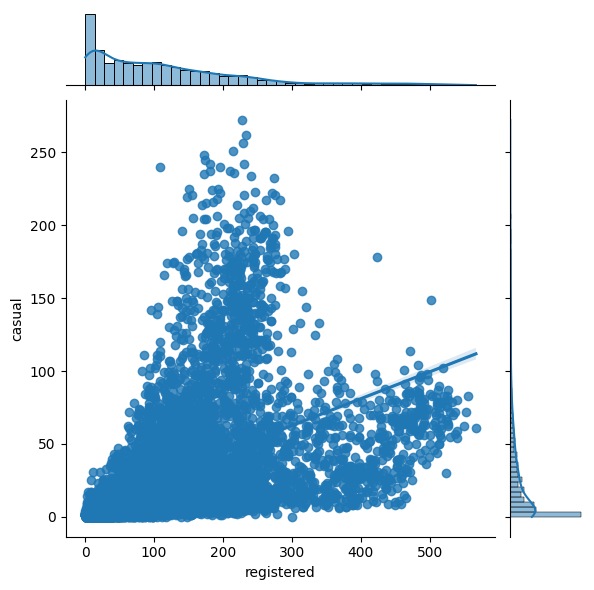

In [108]:
sns.jointplot(data=df2011,x='registered',y='casual',kind='reg');

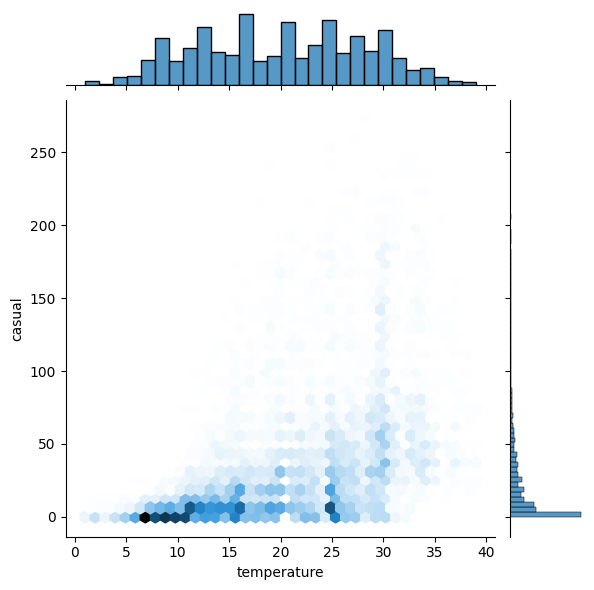

In [109]:
sns.jointplot(data=df2011,x='temperature',y='casual',kind='hex');

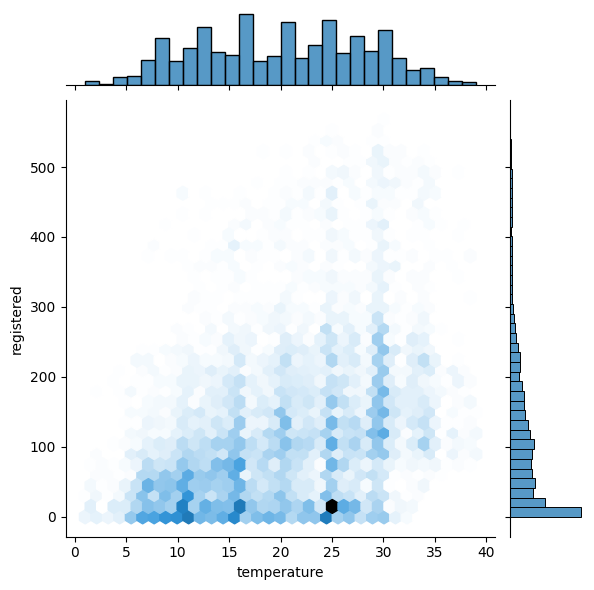

In [110]:
sns.jointplot(data=df2011,x='temperature',y='registered',kind='hex');

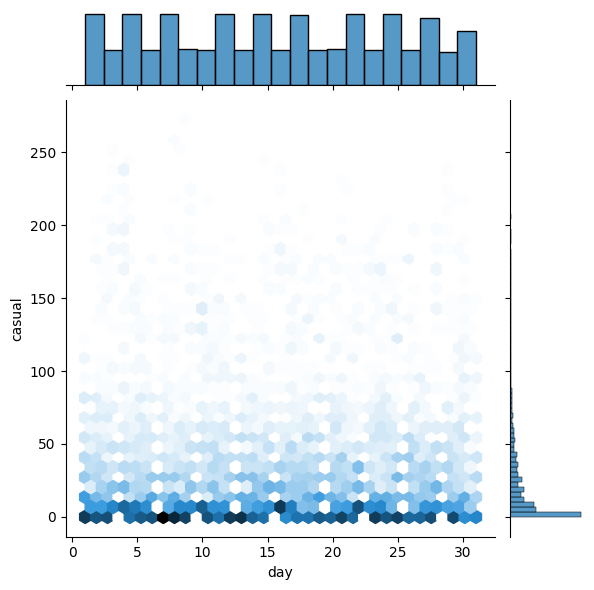

In [111]:
sns.jointplot(data=df2011,x='day',y='casual',kind='hex');

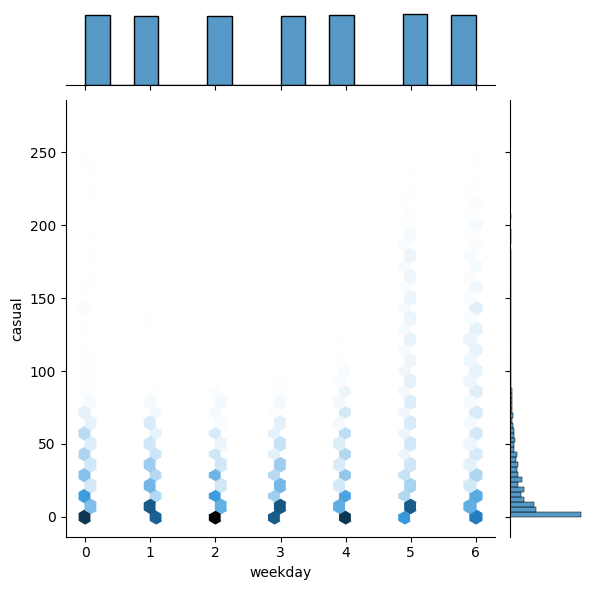

In [112]:
sns.jointplot(data=df2011,x='weekday',y='casual',kind='hex');

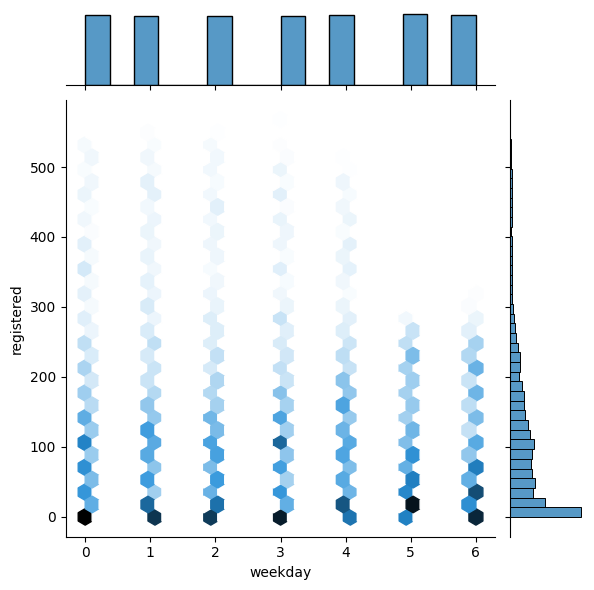

In [113]:
sns.jointplot(data=df2011,x='weekday',y='registered',kind='hex');

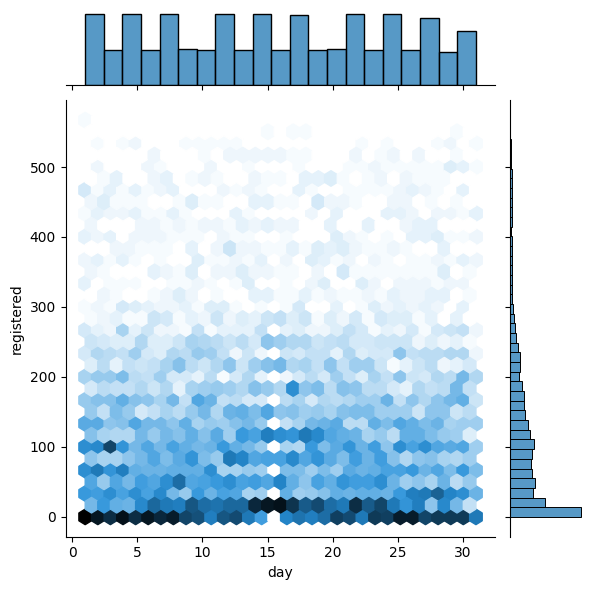

In [114]:
sns.jointplot(data=df2011,x='day',y='registered',kind='hex');

### Análisis multivariante

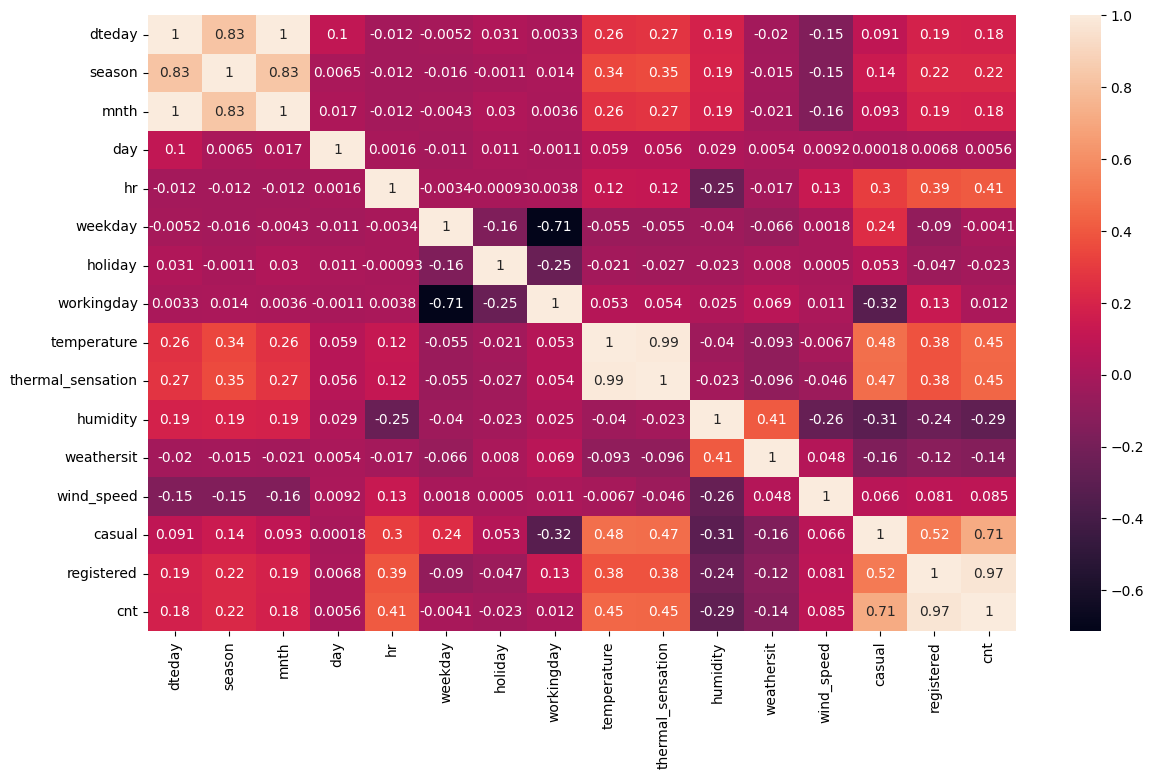

In [115]:
plt.figure(figsize=(14,8))
sns.heatmap(df2011.select_dtypes(exclude=['object']).corr(), annot=True);

## Hipótesis

> #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto sobre la cantidad promedio de viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas (primavera y verano) y una disminución en las estaciones más frías(invierno y otoño).**
 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2011 = pd.read_csv('./data/Dataset_clear_2011.csv', sep=',', parse_dates=['dteday'])
df2011.set_index('instant').head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


In [7]:
dfH1 = df2011.groupby('season')[['cnt']].mean().reset_index()
dfH1

,season,cnt
0,1,72.533849
1,2,157.655924
2,3,187.343750
3,4,152.828960


<Axes: xlabel='season', ylabel='cnt'>

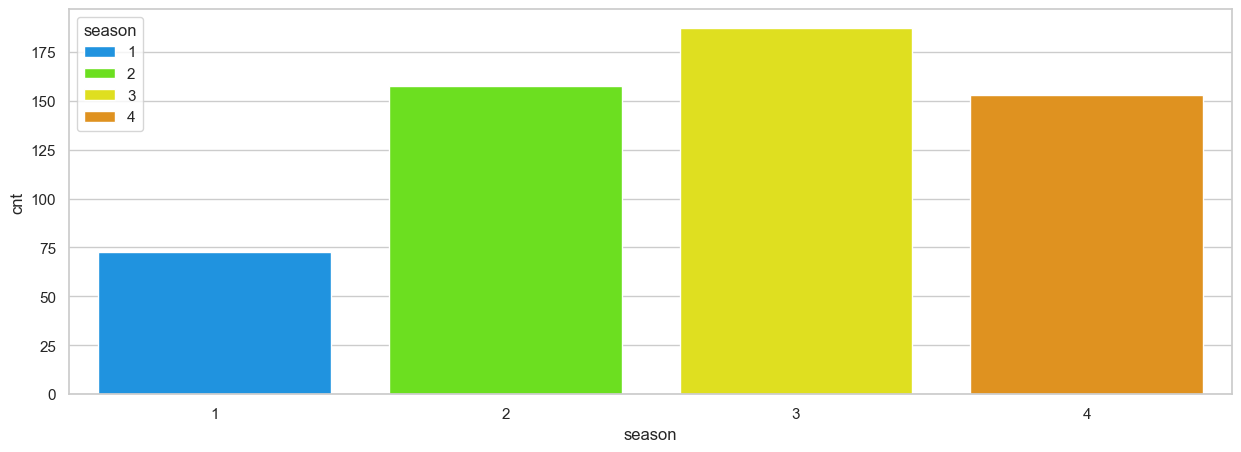

In [8]:
plt.figure(figsize=(15,5))

sns.set_theme(style="whitegrid")
sns.barplot(data= dfH1, x='season',y='cnt', hue='season', palette={1:'#0099FF',2: '#66FF00',3:'#FFFF00',4: '#FF9800'});

In [5]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,instant,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
0,1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
1,2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
2,3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
3,4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
4,5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8641,8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8642,8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio
8643,8644,2011-12-31,1,12,31,22,5,0,0,16.0,20.0,62.0,1,9.0,2,36,38,frio


In [6]:
ALPHA = 0.05

from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según la estación del año.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7054605.0, p_value = 4.7389111611635094e-86
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de biciletas entre estaciones frías y cálidas


******

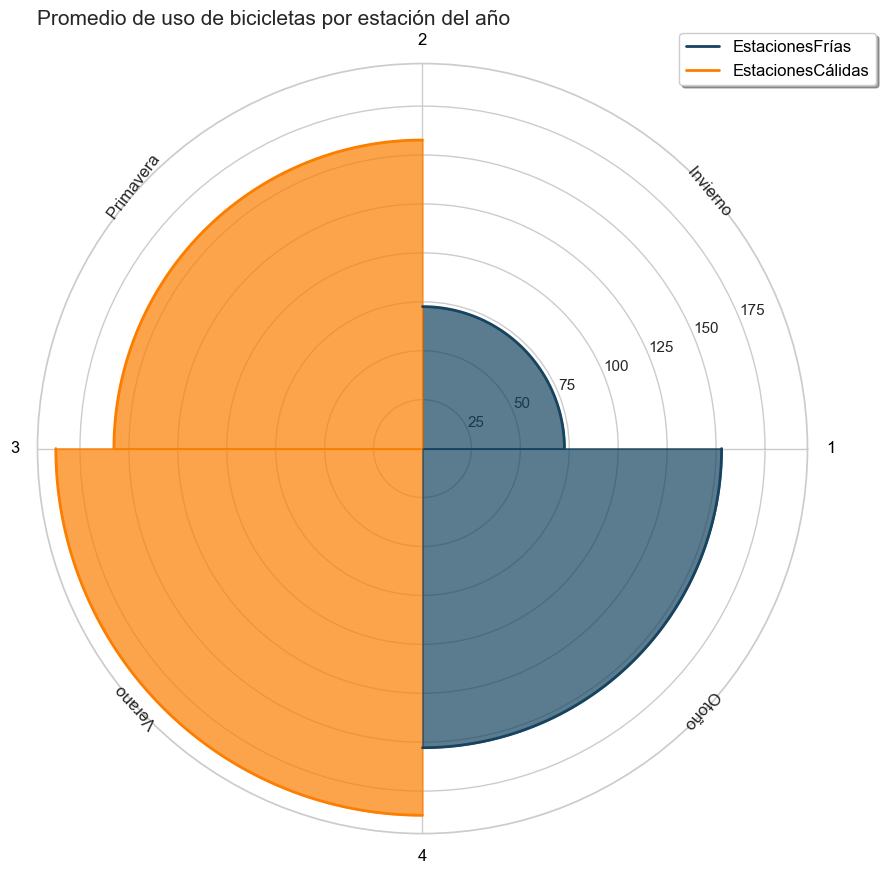

In [16]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

season = [1,2,3,4]

valores = [cant for cant in dfH1["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='black', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['#154360', '#FC7E00', '#FC7E00', '#154360']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.7)

    # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=2, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=2, linestyle='solid'))
    # # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='medium')

plt.legend(legend_lines, [f'Estaciones{s}' for s in ['Frías','Cálidas']], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='medium', shadow=True, labelcolor='black')

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


Hipótesis 2
Según las estaciones más cálidas ¿Cuál de las dos presenta un uso mayor?

In [19]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre la estación primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según la estación primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre la estación primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre la estación primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2176360.5, p_value = 9.950643607180731e-12
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre la estación primavera y verano


In [44]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(data=dfH2.query('season == 2'), x='mnth', y='cnt')
axes[1].hist(data=dfH2.query('season == 3'), x='mnth', y='cnt')

plt.show()

ConversionError: Failed to convert value(s) to axis units: 'cnt'

<Figure size 1000x400 with 2 Axes>

Como vemos, luego de aplicar a tráves de la estadística inferencial los meses, varían de una manera significativa en cuanto al promedio de su uso, por ende el verano podemos ver como este es aun mayor que la primavera

*****

H3 El verano es la temporada de uso con mayores registros a nivel promedio, ahora implementaremos el tipo de cliente, cual de estas estaciones primavera o verano, tiene un uso significativo o no en el promedio de bicicletas entre clientes.

In [46]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes registrados y casuales durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes registrados y casuales durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes registrados y casuales durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes registrados y casuales durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1108205.0, p_value = 1.0516607051900278e-229
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes registrados y casuales durante la estación de verano.


In [49]:
dfH3 = df2011.query('season == 3').groupby(['season', 'mnth']).agg({'casual': 'mean', 'registered': 'mean'})
dfH3

casual  registered
season mnth                       
3      6     42.970833  164.220833
       7     48.994624  140.979839
       8     39.455540  147.536252
       9     37.796190  137.236190

GRAFICAR, PENSE EN UNO DE LINEAS

*****

H4 Como podemos analizar en eñ grafico anterior, vemos que el mes de mayor uso se posa en el mes (un num) y el de mnor uso: Estos son distintos segun casuales y registrados.

In [ ]:
dfH3 = df2011.query('season == 3').groupby(['season', 'mnth']).agg({'casual': 'mean', 'registered': 'mean'}) 
#ELEGIR EL MES

GRAFICAR.

*****

In [50]:
df2011.query('season == 3').groupby(['weekday', 'day']).agg({'casual': 'mean', 'registered': 'mean'})

casual  registered
weekday day                        
0       1     30.375000  147.375000
        4    127.708333  124.083333
        5     51.500000   88.125000
        8     35.250000  145.000000
        11    30.125000  140.125000
...                 ...         ...
6       21    52.041667  109.333333
        24    43.750000  106.500000
        26    80.000000  141.041667
        28    83.235294  171.705882
        31    63.500000  115.750000

[94 rows x 2 columns]